In [391]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

In [392]:
# import data
df = pd.read_csv('sports_management_encoded.csv')
df.head()

,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,Social Impact Level,Resource Efficiency,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused,Event Type Classification_Health-Oriented,Event Type Classification_Recreational,Event Type Classification_Youth-Focused
0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,2.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102000 entries, 0 to 101999
Data columns (total 20 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Energy Consumption                         102000 non-null  float64
 1   Carbon Emissions                           102000 non-null  float64
 2   Waste Generation                           102000 non-null  float64
 3   Community Engagement                       102000 non-null  float64
 4   Volunteer Participation                    102000 non-null  float64
 5   Health Impact                              102000 non-null  float64
 6   Water Usage                                102000 non-null  float64
 7   Material Recycling Rate                    102000 non-null  float64
 8   Operational Cost Efficiency                102000 non-null  float64
 9   Sustainability Score                       102000 non-null  float64
 10  Social I

In [394]:
# create an x and y variable
X = df.drop('Social Impact Level', axis=1)
y = df['Social Impact Level']

In [395]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [396]:
# Review the distinct values from y
y_train.value_counts()

Social Impact Level
1.0    30672
0.0    22928
2.0    22900
Name: count, dtype: int64

In [397]:
#RandomForestClassifier

In [398]:
# Instantiate a RandomForestClassifier instance
model = RandomForestClassifier()

# Fit the traning data to the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [399]:
# Calculate the accuracy of the model on the testing data
model.score(X_test, y_test)

0.35580392156862745

In [400]:
# Create a loop to vary the max_depth parameter
# Make sure to record the train and test scores 
# for each pass.

# Depths should span from 1 up to 15 in steps of 1
depths = range(1, 10)

# The scores dataframe will hold depths and scores
# to make plotting easy
scores = {'train': [], 'test': [], 'depth': []}

# Loop through each depth
for depth in depths:
    clf = RandomForestClassifier(max_depth=depth)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    scores['depth'].append(depth)
    scores['train'].append(train_score)
    scores['test'].append(test_score)

# Create a dataframe from the scores dictionary and
# set the index to depth
scores_df = pd.DataFrame(scores).set_index('depth')

<Axes: xlabel='depth'>

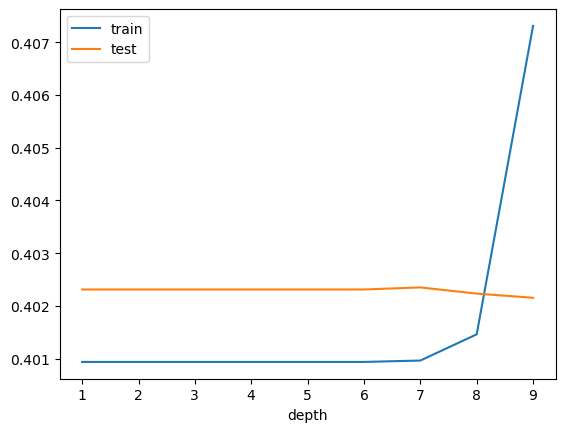

In [401]:
# Plot the scores dataframe with the plot method
scores_df.plot()

In [402]:
#Evaluate the model
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.972156862745098
Testing Data Score: 0.35580392156862745


In [403]:
# Get the feature importance array
feature_importances = clf.feature_importances_

In [404]:
# List the top 10 most important features
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importances_sorted[:20]

[(0.07460070220264596, 'Resource Efficiency'),
 (0.07101389059856061, 'Sustainability Score'),
 (0.07089577672290452, 'Waste Generation'),
 (0.06930786374029922, 'Water Usage'),
 (0.06758117752259478, 'Volunteer Participation'),
 (0.06713898736238402, 'Material Recycling Rate'),
 (0.06676101031088547, 'Health Impact'),
 (0.06378788097448568, 'Operational Cost Efficiency'),
 (0.06331215400246869, 'Carbon Emissions'),
 (0.06223727585314609, 'Community Engagement'),
 (0.06145757612386268, 'Energy Consumption'),
 (0.03829962924338048, 'Event Scale_Regional'),
 (0.03756501911197107, 'Event Scale_National'),
 (0.032700257777797094, 'Event Focus_Youth-Focused'),
 (0.03218413866094262, 'Event Focus_Health-Oriented'),
 (0.03174144660725648, 'Event Focus_Recreational'),
 (0.031202848717720746, 'Event Type Classification_Youth-Focused'),
 (0.03031124024970139, 'Event Type Classification_Recreational'),
 (0.02790112421699226, 'Event Type Classification_Health-Oriented')]

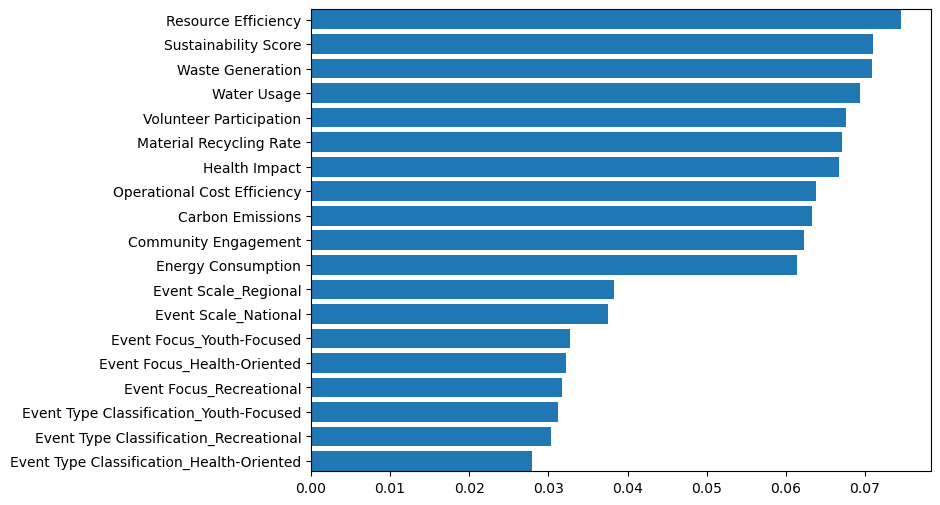

In [405]:
# Plot the feature importances
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [406]:
# Predict labels for original scaled testing features
y_pred = model.predict(X_test)

In [296]:
#Random Undersampler

In [297]:
# Instantiate a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

In [298]:
# Fit the training data to the random undersampler model
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

In [299]:
# Count distinct values for the resampled target data
y_undersampled.value_counts()

Sustainability Score
0.0    15331
1.0    15331
2.0    15331
Name: count, dtype: int64

In [300]:
# Instantiate a new RandomForestClassier model
model_undersampled = RandomForestClassifier()

# Fit the undersampled data the new model
model_undersampled.fit(X_undersampled, y_undersampled)

RandomForestClassifier()

In [301]:
#Evaluate the model
print(f"Training Data Score: {model_undersampled.score(X_undersampled, y_undersampled)}")
print(f"Testing Data Score: {model_undersampled.score(X_test, y_test)}")

Training Data Score: 0.984758550214163
Testing Data Score: 0.33458823529411763


In [302]:
# Predict labels for oversampled testing features
y_pred_undersampled = model_undersampled.predict(X_test)

In [303]:
#Random Oversampler

In [304]:
# Instantiate a RandomOversampler instance
ros = RandomOverSampler(random_state=1)

In [305]:
# Fit the training data to the `RandomOverSampler` model
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

In [306]:
# Count distinct values
y_oversampled.value_counts()

Sustainability Score
0.0    38155
2.0    38155
1.0    38155
Name: count, dtype: int64

In [307]:
# Instantiate a new RandomForestClassier model
model_oversampled = RandomForestClassifier()

# Fit the oversampled data the new model
model_oversampled.fit(X_oversampled, y_oversampled)

RandomForestClassifier()

In [308]:
#Evaluate the model
print(f"Training Data Score: {model_oversampled.score(X_oversampled, y_oversampled)}")
print(f"Testing Data Score: {model_oversampled.score(X_test, y_test)}")

Training Data Score: 0.9822740575721837
Testing Data Score: 0.41031372549019607


In [309]:
# Predict labels for oversampled testing features
y_pred_oversampled = model_oversampled.predict(X_test)

In [310]:
#Cluster Centroids

In [311]:
# Instantiate a ClusterCentroids instance
cc_sampler = ClusterCentroids(random_state=1)

In [312]:
# Fit the training data to the cluster centroids model
X_resampled, y_resampled = cc_sampler.fit_resample(X_train, y_train)

In [313]:
# Count distinct values for the resampled target data
y_resampled.value_counts()

Sustainability Score
0.0    15331
1.0    15331
2.0    15331
Name: count, dtype: int64

In [314]:
# Instantiate a new RandomForestClassier model
cc_model = RandomForestClassifier()

# Fit the resampled data the new model
cc_model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [315]:
#Evaluate the model
print(f"Training Data Score: {cc_model.score(X_resampled, y_resampled)}")
print(f"Testing Data Score: {cc_model.score(X_test, y_test)}")

Training Data Score: 0.9980431804839867
Testing Data Score: 0.2535686274509804


In [316]:
# Predict labels for resampled testing features
cc_y_pred = cc_model.predict(X_test)

In [317]:
#SMOTE

In [318]:
# Instantiate the SMOTE instance 
# Set the sampling_strategy parameter equal to auto
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')

In [319]:
# Fit the training data to the smote_sampler model
X_resampled, y_resampled = smote_sampler.fit_resample(X_train, y_train)

In [320]:
# Count distinct values for the resampled target data
y_resampled.value_counts()

Sustainability Score
0.0    38155
2.0    38155
1.0    38155
Name: count, dtype: int64

In [321]:
# Instantiate a new RandomForestClassier model 
smote_model = RandomForestClassifier()

# Fit the resampled data to the new model
smote_model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [322]:
#Evaluate the model
print(f"Training Data Score: {smote_model.score(X_resampled, y_resampled)}")
print(f"Testing Data Score: {smote_model.score(X_test, y_test)}")

Training Data Score: 0.984213515048268
Testing Data Score: 0.4364313725490196


In [323]:
# Predict labels for resampled testing features
smote_y_pred = smote_model.predict(X_test)

In [324]:
#SMOTEENN

In [325]:
# Instantiate the SMOTEENN instance
smote_enn = SMOTEENN(random_state=1)

In [326]:
# Fit the model to the training data
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [327]:
# Instantiate a new RandomForestClassier model
smoteenn_model = RandomForestClassifier()

# Fit the resampled data the new model
smoteenn_model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [328]:
#Evaluate the model
print(f"Training Data Score: {smoteenn_model.score(X_resampled, y_resampled)}")
print(f"Testing Data Score: {smoteenn_model.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.24027450980392157


In [329]:
# Predict labels for resampled testing features
smoteenn_y_pred = smoteenn_model.predict(X_test)

In [330]:
# Print classification reports
print(f"Classification Report - Original Data")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Undersampled Data")
print(classification_report(y_test, y_pred_undersampled))
print("---------")
print(f"Classification Report - Oversampled Data")
print(classification_report(y_test, y_pred_oversampled))
print("---------")
print(f"Classification Report - Resampled Data - CentroidClusters")
print(classification_report(y_test, cc_y_pred))
print("---------")
print(f"Classification Report - Resampled Data - SMOTE")
print(classification_report(y_test, smote_y_pred))
print("---------")
print(f"Classification Report - Resampled Data - SMOTEENN")
print(classification_report(y_test, smoteenn_y_pred))

Classification Report - Original Data
              precision    recall  f1-score   support

         0.0       0.18      0.05      0.08      5081
         1.0       0.31      0.17      0.22      7877
         2.0       0.49      0.78      0.60     12542

    accuracy                           0.45     25500
   macro avg       0.33      0.33      0.30     25500
weighted avg       0.37      0.45      0.38     25500

---------
Classification Report - Undersampled Data
              precision    recall  f1-score   support

         0.0       0.20      0.34      0.25      5081
         1.0       0.31      0.34      0.32      7877
         2.0       0.49      0.33      0.40     12542

    accuracy                           0.33     25500
   macro avg       0.34      0.34      0.32     25500
weighted avg       0.38      0.33      0.35     25500

---------
Classification Report - Oversampled Data
              precision    recall  f1-score   support

         0.0       0.19      0.12      0.1